### Creates a correlation matrix
This used to see if we should remove or combine some features

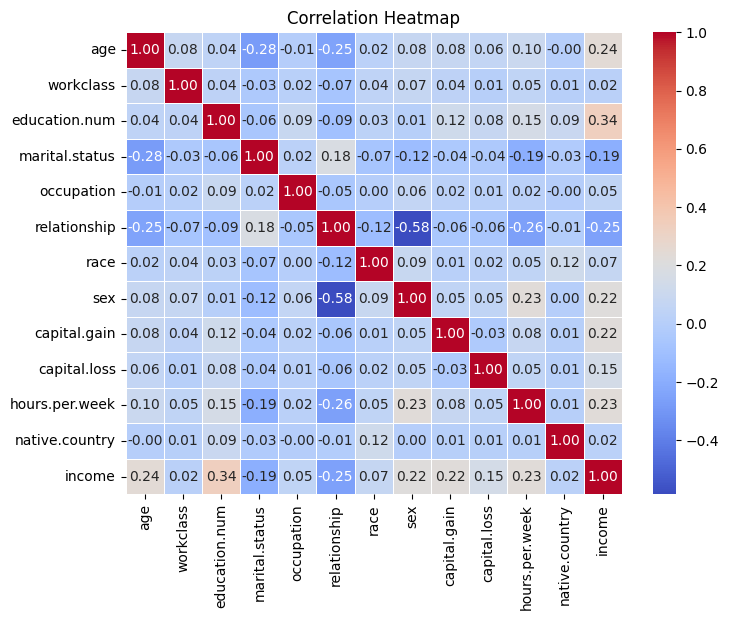

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   marital.status  30162 non-null  int64
 4   occupation      30162 non-null  int64
 5   relationship    30162 non-null  int64
 6   race            30162 non-null  int64
 7   sex             30162 non-null  int64
 8   capital.gain    30162 non-null  int64
 9   capital.loss    30162 non-null  int64
 10  hours.per.week  30162 non-null  int64
 11  native.country  30162 non-null  int64
 12  income          30162 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


df = pd.read_csv('./Datasets/adult.csv', comment = '#')


# First, create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()
df_encoded.drop(['fnlwgt', 'education'], axis=1, inplace=True)


# drop all rows that contain '?'
for column in df_encoded.columns:
    df_encoded = df_encoded[df_encoded[column] != '?']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex', 'native.country', 'income']

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


matrix = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#df_encoded.head(10)
df_encoded.info()
#df.head(20)


### Creates a pairplot
This demonstrates that we need a model that is appropriate for discrete data (Decision Tree, Random Forest, Naive Bayes)

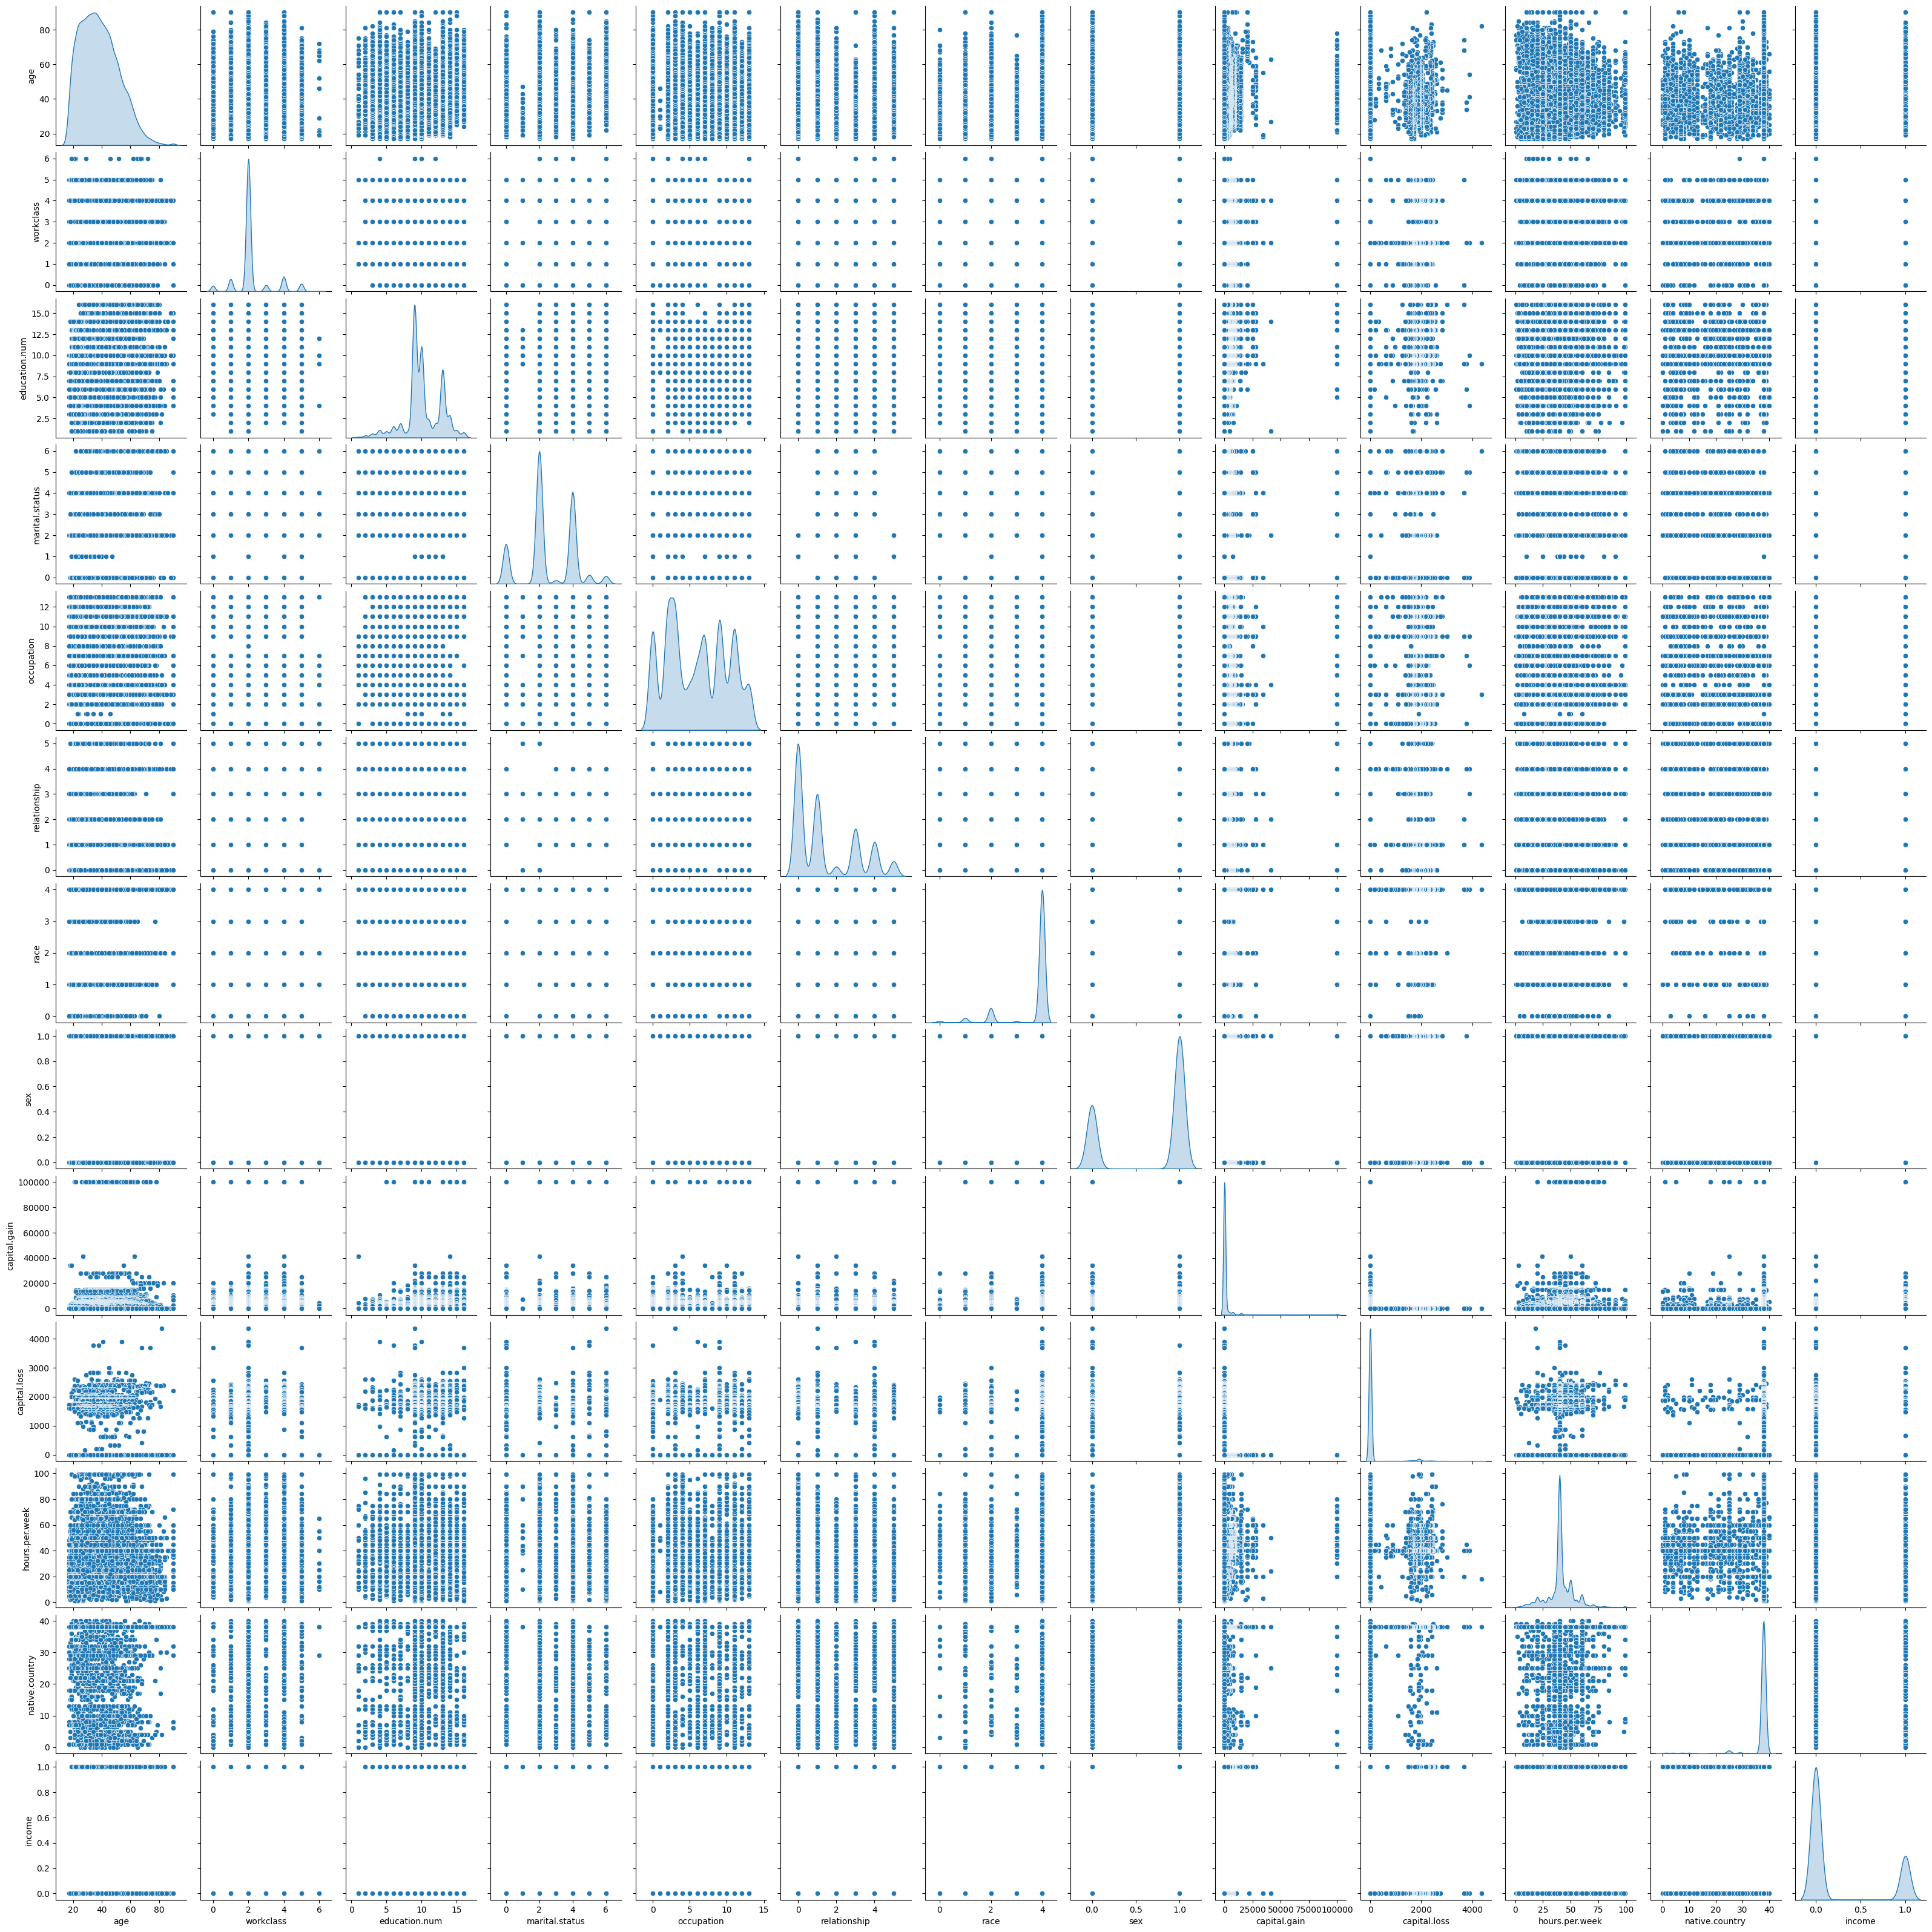

In [30]:
sns.pairplot(df_encoded, diag_kind="kde")
plt.show()